# Testing Multi-Agent via ADK

Reference:
- Multi-Agent: https://developers.googleblog.com/en/agent-development-kit-easy-to-build-multi-agent-applications/
- ADK-Starter: https://github.com/vladeziegler/Vladoesgrowth/tree/main/ADKStarterKit
- ADK-MCP: https://google.github.io/adk-docs/tools/mcp-tools/
- Google Demo: https://www.youtube.com/watch?v=44C8u0CDtSo
- Official Doc: https://google.github.io/adk-docs/

In [3]:
from google.adk.agents import LlmAgent 
from google.adk.tools import google_search

dice_agent = LlmAgent(
    model="gemini-2.0-flash-exp", # Required: Specify the LLM 
    name="question_answer_agent", # Requdired: Unique agent name
    description="A helpful assistant agent that can answer questions.",
    instruction="""Respond to the query using google search""",
    tools=[google_search], # Provide an instance of the tool
)

In [ ]:
from google.adk.agents import Agent

greeting_agent = Agent(
         model=LiteLlm(model="anthropic/claude-3-sonnet-20240229"),
            name="greeting_agent",
            instruction="You are the Greeting Agent. Your ONLY task is to provide a friendly greeting to the user. " "Do not engage in any other conversation or tasks.",
            # Crucial for delegation: Clear description of capability
            description="Handles simple greetings and hellos",
            
 )

farewell_agent = Agent(
        model=LiteLlm(model="anthropic/claude-3-sonnet-20240229"),
        name="farewell_agent",
        instruction="You are the Farewell Agent. Your ONLY task is to provide a polite goodbye message. "
                        "Do not perform any other actions.",
            # Crucial for delegation: Clear description of capability
            description="Handles simple farewells and goodbyes",
            
 )

root_agent = Agent(
        name="weather_agent_v2", 
        model="gemini-2.0-flash-exp",
        description="You are the main Weather Agent, coordinating a team. - Your main task: Provide weather using the `get_weather` tool. Handle its 'status' response ('report' or 'error_message'). - Delegation Rules: - If the user gives a simple greeting (like 'Hi', 'Hello'), delegate to `greeting_agent`. - If the user gives a simple farewell (like 'Bye', 'See you'), delegate to `farewell_agent`. - Handle weather requests yourself using `get_weather`. - For other queries, state clearly if you cannot handle them.",
        tools=[get_weather], # Root agent still needs the weather tool
        sub_agents=[greeting_agent, farewell_agent]
)

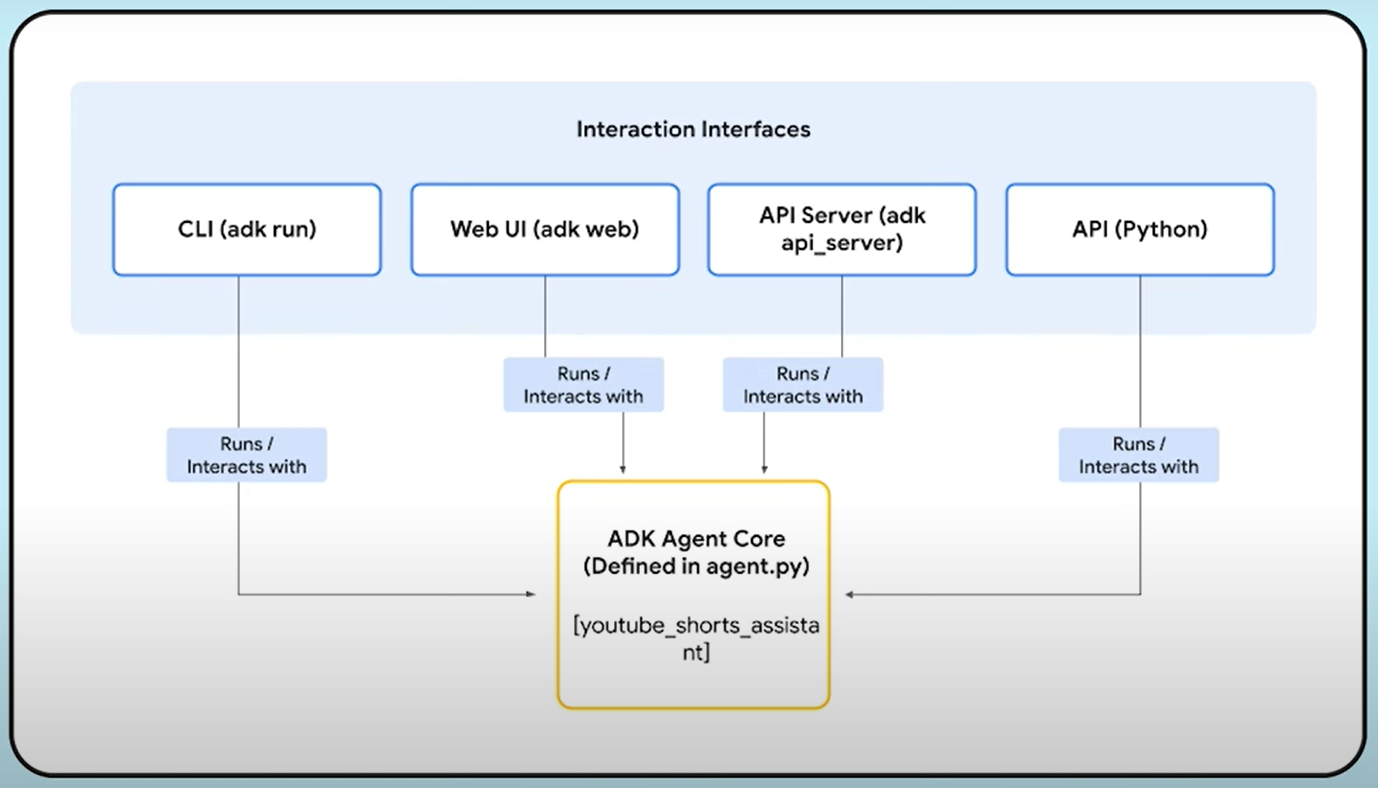

In [1]:
from IPython.display import Image, display

display(Image(filename='images/run_interface.png'))

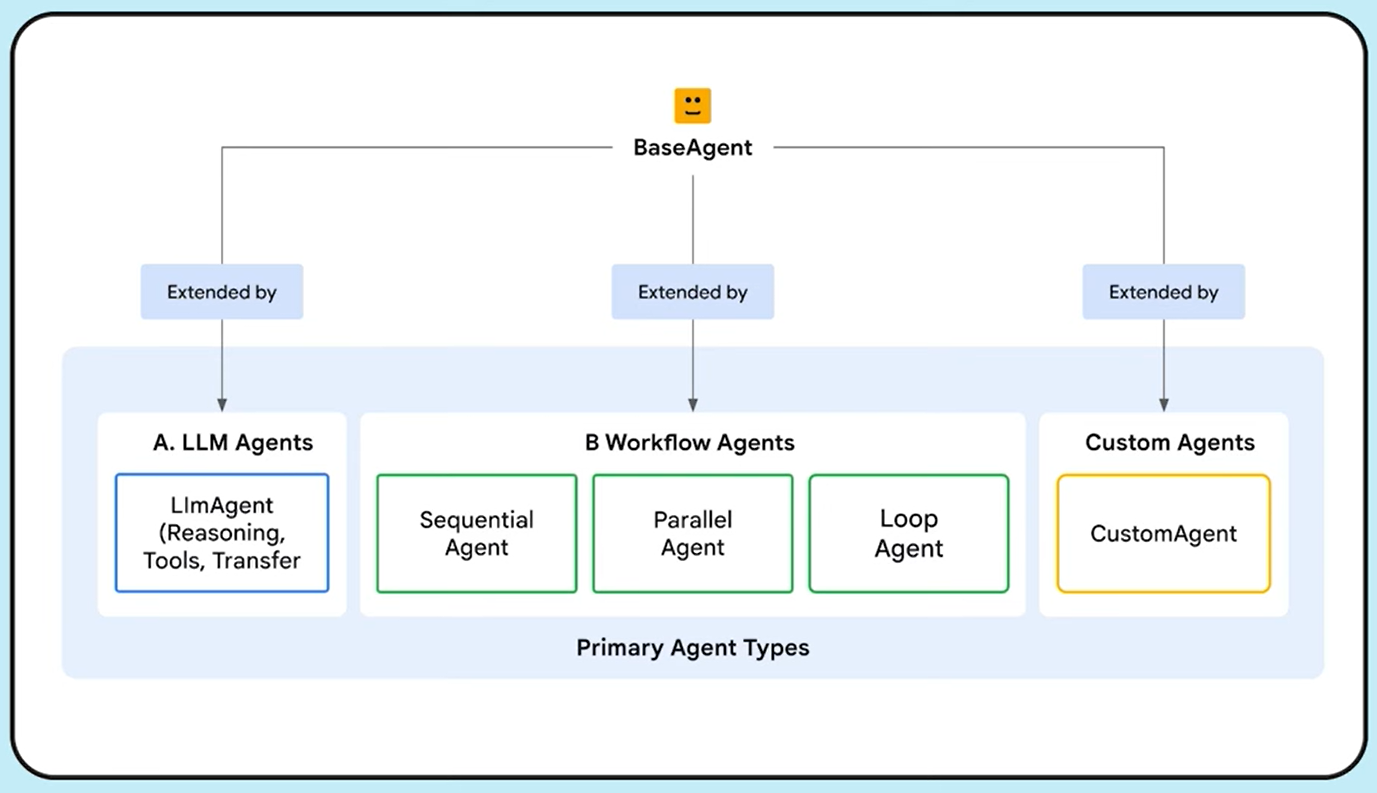

In [2]:
from IPython.display import Image, display

display(Image(filename='images/primary_agent_types.png'))

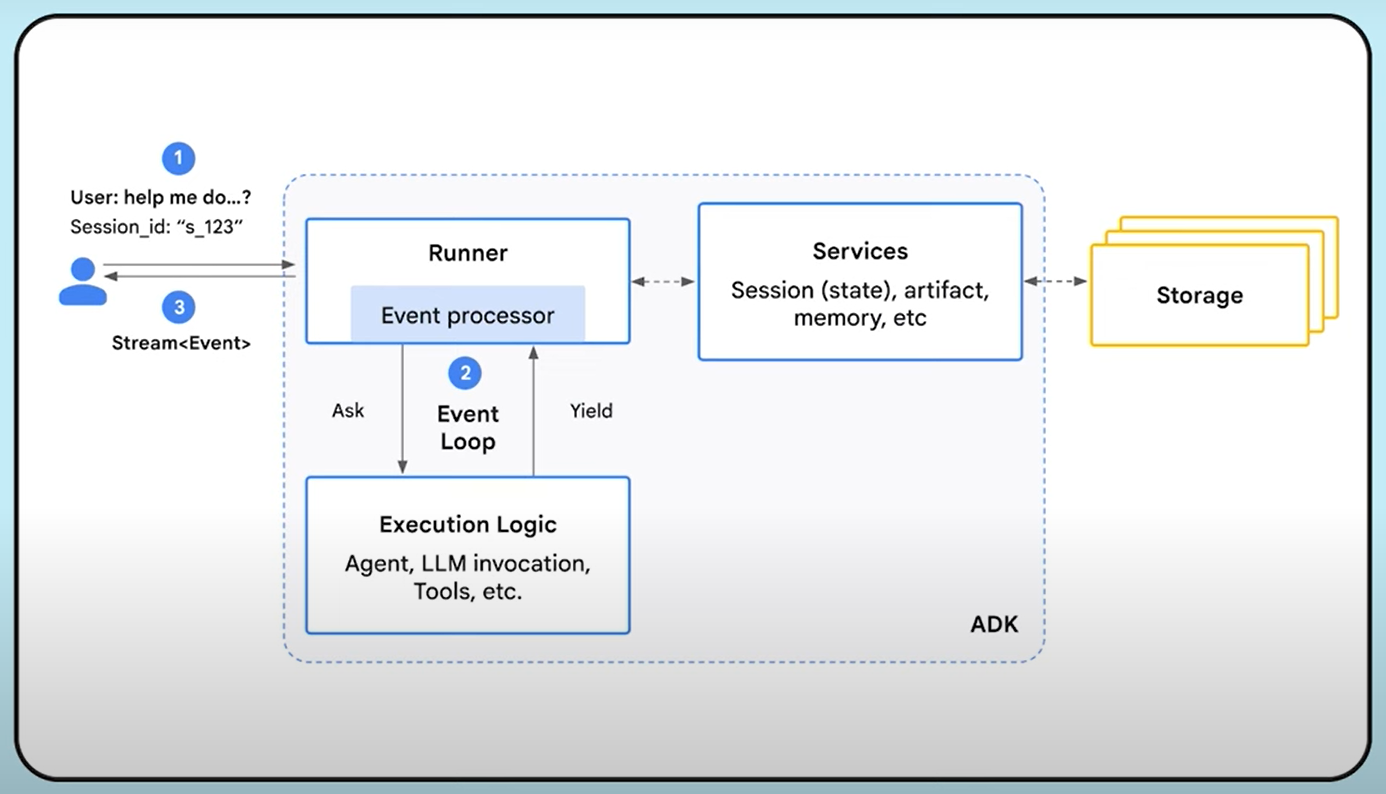

In [3]:
from IPython.display import Image, display

display(Image(filename='images/code_run.png'))